<a href="https://colab.research.google.com/github/aritanaoya/howling_canceler/blob/master/howling_canceller_with_DNCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install librosa==0.7

##モジュールの導入



In [0]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct
import librosa.core as lc  
import scipy 
import IPython.display as ipd
import os
import librosa.display
import IPython.display as ipd


##google driveとの連携

In [0]:
import os, shutil

os.getcwd()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1iygx3kgPJzfBqeHm7-MN9SSMWNvcoy3-'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('wav_files.zip')

In [0]:
id = '1RrimD9pvkrhepvrPv3790d2sx1NZTe66'  # 共有リンクで取得した id= より後の部分
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('how_sounds.zip')

In [6]:
!unzip wav_files.zip
!unzip how_sounds.zip
!ls
import librosa
import librosa.core as lc  
import numpy as np  
import scipy 
import IPython.display as ipd
import os
import matplotlib.pyplot as plt

import librosa.display


Archive:  wav_files.zip
replace wav_files/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  how_sounds.zip
replace how_sounds/how_high.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 7_wav_files	 how_cancel_model.json	     how_sounds      sample_data
7_wav_files.zip  how_cancel_model_wights.h5  how_sounds.zip  wav_files
adc.json	 howling_canceller_DnCNN     __MACOSX	     wav_files.zip


##音声を読み込み分割

In [7]:
correct_sound1,sr =librosa.load("/content/wav_files/g_01.wav", sr=44100,duration=20)

correct_sounds1=[]
correct_sounds1=np.split(correct_sound1,20,axis=0)
print(correct_sounds1[1].shape)
how_sound,sr=librosa.load("/content/how_sounds/howling.wav" ,sr=44100,duration=4)
how_sound2,sr=librosa.load("/content/how_sounds/how_high.wav" ,sr=44100 ,duration=2)
how_sound3,sr=librosa.load("/content/how_sounds/how_low.wav" ,sr=44100, duration=2)

(44100,)


In [8]:
print(correct_sound1.shape)

(882000,)


In [9]:
correct_sound2,sr =librosa.load("/content/wav_files/g_02.wav", sr=44100,duration=20)
correct_sounds2=[]
correct_sounds2=np.split(correct_sound2,20,axis=0)
print(correct_sounds2[1].shape)

correct_sound3,sr =librosa.load("/content/wav_files/g_03.wav", sr=44100,duration=20)
correct_sounds3=[]
correct_sounds3=np.split(correct_sound3,20,axis=0)
print(correct_sounds3[1].shape)

correct_sound4,sr =librosa.load("/content/wav_files/g_05.wav", sr=44100,duration=20)
correct_sounds4=[]
correct_sounds4=np.split(correct_sound4,20,axis=0)
print(correct_sounds4[1].shape)


correct_sound5,sr =librosa.load("/content/wav_files/g_06.wav", sr=44100,duration=20)
correct_sounds5=[]
correct_sounds5=np.split(correct_sound5,20,axis=0)
print(correct_sounds5[1].shape)


correct_sound6,sr =librosa.load("/content/wav_files/g_08.wav", sr=44100,duration=20)
correct_sounds6=[]
correct_sounds6=np.split(correct_sound6,20,axis=0)
print(correct_sounds6[1].shape)


(44100,)
(44100,)
(44100,)
(44100,)
(44100,)


##ハウリングの付着

In [47]:
out_sounds1=[]

out1_1=correct_sound1[0:176400] + how_sound
out1_2=correct_sound1[176400:441000]
out1_3=correct_sound1[441000:617400] + how_sound
out1_4=correct_sound1[617400:882000]


out_sound1=np.concatenate([out1_1,out1_2,out1_3,out1_4],axis=0)
out_sounds1=np.split(out_sound1,20,axis=0)
print(out_sound1.shape)
ipd.Audio(data=out_sound1,rate=44100)

(882000,)


In [0]:
out_sounds2=[]
out_sounds3=[]
out_sounds4=[]
out_sounds5=[]
out_sounds6=[]

out2_1=correct_sound2[0:176400] + how_sound
out2_2=correct_sound2[176400:441000]
out2_3=correct_sound2[441000:617400] 
out2_4=correct_sound2[617400:793800]+ how_sound
out2_5=correct_sound2[793800:882000]


out_sound2=np.concatenate([out2_1,out2_2,out2_3,out2_4,out2_5],axis=0)

out3_1=correct_sound3[0:176400] + how_sound
out3_2=correct_sound3[176400:441000]
out3_3=correct_sound3[441000:705600] 
out3_4=correct_sound3[705600:882000]+ how_sound

out_sound3=np.concatenate([out3_1,out3_2,out3_3,out3_4],axis=0)

out4_1=correct_sound4[0:264600] 
out4_2=correct_sound4[264600:441000]+ how_sound
out4_3=correct_sound4[441000:705600] 
out4_4=correct_sound4[705600:882000]+ how_sound

out_sound4=np.concatenate([out4_1,out4_2,out4_3,out4_4],axis=0)

out5_1=correct_sound5[0:264600] 
out5_2=correct_sound5[264600:441000]+ how_sound
out5_3=correct_sound5[441000:617400] 
out5_4=correct_sound5[617400:793800]+ how_sound
out5_5=correct_sound5[793800:882000]

out_sound5=np.concatenate([out5_1,out5_2,out5_3,out5_4,out5_5],axis=0)

out6_1=correct_sound6[0:264600] 
out6_2=correct_sound6[264600:441000]+ how_sound
out6_3=correct_sound6[441000:705600] 
out6_4=correct_sound6[705600:882000]+ how_sound

out_sound6=np.concatenate([out6_1,out6_2,out6_3,out6_4],axis=0)

out_sounds2=np.split(out_sound2,20,axis=0)
out_sounds3=np.split(out_sound3,20,axis=0)
out_sounds4=np.split(out_sound4,20,axis=0)
out_sounds5=np.split(out_sound5,20,axis=0)
out_sounds6=np.split(out_sound6,20,axis=0)


In [12]:
ipd.Audio(data=out_sound2,rate=44100)

In [13]:
ipd.Audio(data=out_sound3,rate=44100)

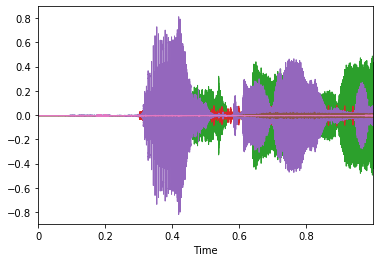

In [14]:
librosa.display.waveplot(out_sounds1[0], 44100)
librosa.display.waveplot(out_sounds2[0], 44100)
librosa.display.waveplot(out_sounds3[0], 44100)
librosa.display.waveplot(out_sounds4[0], 44100)
librosa.display.waveplot(out_sounds5[0], 44100)
librosa.display.waveplot(out_sounds6[0], 44100)
librosa.display.waveplot(correct_sounds1[0], 44100)

## Get the power spectrogram

In [15]:
def cal_power_spectrogram(y):
  x=[]
  for i in  range(len(y)):
    x.append(np.abs(librosa.stft(y[i],n_fft = 1024)))
  return x

train_files1=[]
train_files2=[]
train_files3=[]
train_files4=[]
train_files5=[]
train_filest6=[]
train_noisy_files1=[]
train_noisy_files2 =[]
train_noisy_files3 =[]
train_noisy_files4 =[]
train_noisy_files5 =[]
train_noisy_files6 =[]

train_files1 = cal_power_spectrogram(correct_sounds1)
train_files2 = cal_power_spectrogram(correct_sounds2)
train_files3 = cal_power_spectrogram(correct_sounds3)
train_files4 = cal_power_spectrogram(correct_sounds4)
train_files5 = cal_power_spectrogram(correct_sounds5)
train_files6 = cal_power_spectrogram(correct_sounds6)


train_noisy_files1 = cal_power_spectrogram(out_sounds1)
train_noisy_files2 = cal_power_spectrogram(out_sounds2)
train_noisy_files3 = cal_power_spectrogram(out_sounds3)
train_noisy_files4 = cal_power_spectrogram(out_sounds4)
train_noisy_files5 = cal_power_spectrogram(out_sounds5)
train_noisy_files6 = cal_power_spectrogram(out_sounds6)

x1 = np.array(train_files1)
train_files_1 =np.log(x1 + 1e-10)
x2 = np.array(train_files2)
train_files_2 =np.log(x2 + 1e-10)
x3 = np.array(train_files3)
train_files_3 =np.log(x3 + 1e-10)
x4 = np.array(train_files4)
train_files_4 =np.log(x4 + 1e-10)
x5 = np.array(train_files5)
train_files_5 =np.log(x5 + 1e-10)
x6 = np.array(train_files6)
train_files_6 =np.log(x6 + 1e-10)

y1  = np.array(train_noisy_files1)
train_noisy_files_1 =np.log(y1+ 1e-10)
y2  = np.array(train_noisy_files2)
train_noisy_files_2 =np.log(y2+ 1e-10)
y3  = np.array(train_noisy_files3)
train_noisy_files_3 =np.log(y3+ 1e-10)
y4  = np.array(train_noisy_files4)
train_noisy_files_4 =np.log(y4+ 1e-10)
y5  = np.array(train_noisy_files5)
train_noisy_files_5 =np.log(y5+ 1e-10)
y6  = np.array(train_noisy_files6)
train_noisy_files_6 =np.log(y6+ 1e-10)

print(train_files_1[0].shape)

(513, 173)


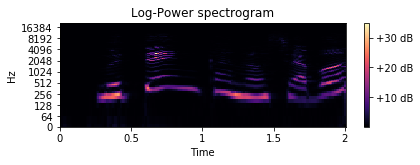

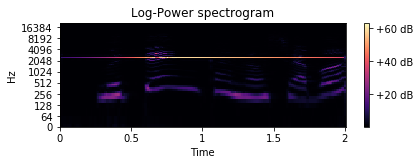

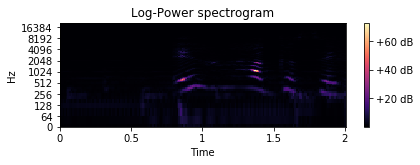

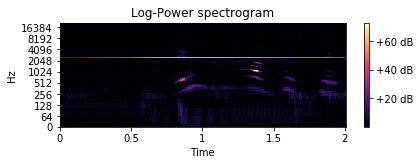

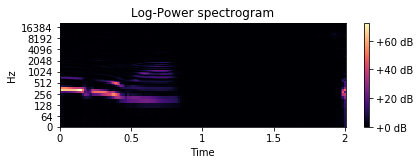

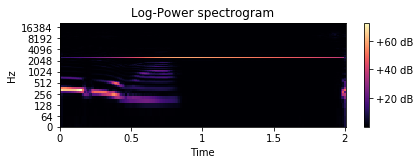

In [16]:
#音声プロット
#パワースペクトルと対数パワースペクトル

def plt_power_spec(S,sr):
  plt.figure()
  plt.subplot(2, 1, 2)
  #S1 = np.exp(S)
  librosa.display.specshow(S,
                         sr=sr, y_axis='log', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Log-Power spectrogram')
  plt.tight_layout()
  plt.show()
  
plt_power_spec(np.exp(train_files_1[1]),44100)
plt_power_spec(np.exp(train_noisy_files_1[1]),44100) 
plt_power_spec(np.exp(train_files_2[1]),44100)
plt_power_spec(np.exp(train_noisy_files_2[1]),44100)
plt_power_spec(np.exp(train_files_3[1]),44100)
plt_power_spec(np.exp(train_noisy_files_3[1]),44100)




(44032,)


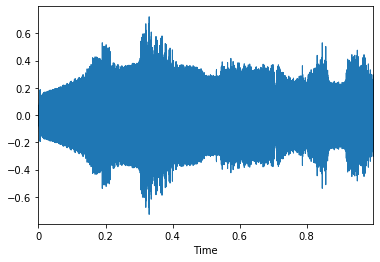

In [17]:
y0=np.exp(train_noisy_files_1[1])
y1=lc.griffinlim(y0)
print(y1.shape)
librosa.display.waveplot(y1, 44100)
ipd.Audio(data=y1,rate=44100)


##型の変更,生成

In [18]:
freq = 513
time = 173

train_num1 =20
train_num2 =20
train_num3 =20
train_num4 =20
train_num5 =20
train_num6 =20
#型の変更
x_train1 = np.zeros(freq*time*train_num1).reshape(train_num1, freq, time)
x_train2 = np.zeros(freq*time*train_num2).reshape(train_num2, freq, time)
x_train3 = np.zeros(freq*time*train_num3).reshape(train_num3, freq, time)
x_train4 = np.zeros(freq*time*train_num4).reshape(train_num4, freq, time)
x_train5 = np.zeros(freq*time*train_num5).reshape(train_num5, freq, time)
x_train6 = np.zeros(freq*time*train_num6).reshape(train_num6, freq, time)

x_train_noisy1=np.zeros(freq*time*train_num1).reshape(train_num1, freq, time)
x_train_noisy2=np.zeros(freq*time*train_num2).reshape(train_num2, freq, time)
x_train_noisy3=np.zeros(freq*time*train_num3).reshape(train_num3, freq, time)
x_train_noisy4=np.zeros(freq*time*train_num4).reshape(train_num4, freq, time)
x_train_noisy5=np.zeros(freq*time*train_num5).reshape(train_num5, freq, time)
x_train_noisy6=np.zeros(freq*time*train_num6).reshape(train_num6, freq, time)

print(x_train1.shape)
print(x_train_noisy1.shape)

(20, 513, 173)
(20, 513, 173)


In [0]:
#関数の定義
def min_max(x, axis=None):
    xmin = x.min(axis=axis, keepdims=True)
    xmax = x.max(axis=axis, keepdims=True)
    result = (x- xmin)/(xmax-xmin)

    return result, xmin ,xmax

def re_min_max(x, min ,max):
  result = x * (max - min) + min
  return result



In [20]:

#正規化
x_train1 , trainmin1 , trainmax1 = min_max(train_files_1)
x_train2 , trainmin2 , trainmax2 = min_max(train_files_2)
x_train3 , trainmin3 , trainmax3 = min_max(train_files_3)
x_train4 , trainmin4 , trainmax4 = min_max(train_files_4)
x_train5 , trainmin5 , trainmax5 = min_max(train_files_5)
x_train6 , trainmin6 , trainmax6 = min_max(train_files_6)

x_train_noisy1, trainmin_noisy1, trainmax_noisy1 = min_max(train_noisy_files_1)
x_train_noisy2, trainmin_noisy2, trainmax_noisy2 = min_max(train_noisy_files_2)
x_train_noisy3, trainmin_noisy3, trainmax_noisy3 = min_max(train_noisy_files_3)
x_train_noisy4, trainmin_noisy4, trainmax_noisy4 = min_max(train_noisy_files_4)
x_train_noisy5, trainmin_noisy5, trainmax_noisy5 = min_max(train_noisy_files_5)
x_train_noisy6, trainmin_noisy6, trainmax_noisy6 = min_max(train_noisy_files_6)

print(x_train_noisy1.shape)

(20, 513, 173)


In [21]:
# CNN用にデータを(batch_size, freq, time, 1)にreshape    
x_train1_re=x_train1.reshape(train_num1, freq, time, 1)
x_train2_re=x_train2.reshape(train_num2, freq, time, 1)
x_train3_re=x_train3.reshape(train_num3, freq, time, 1)
x_train4_re=x_train4.reshape(train_num4, freq, time, 1)
x_train5_re=x_train5.reshape(train_num5, freq, time, 1)
x_train6_re=x_train6.reshape(train_num6, freq, time, 1)

x_train_noisy1_re=x_train_noisy1.reshape(train_num1, freq, time, 1)
x_train_noisy2_re=x_train_noisy2.reshape(train_num2, freq, time, 1)
x_train_noisy3_re=x_train_noisy3.reshape(train_num3, freq, time, 1)
x_train_noisy4_re=x_train_noisy4.reshape(train_num4, freq, time, 1)
x_train_noisy5_re=x_train_noisy5.reshape(train_num5, freq, time, 1)
x_train_noisy6_re=x_train_noisy6.reshape(train_num6, freq, time, 1)

print(x_train2_re.shape)
print(x_train_noisy2_re.shape)

(20, 513, 173, 1)
(20, 513, 173, 1)


##Deep Learning

In [22]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,Reshape,MaxPooling2D,UpSampling2D
from keras.layers import Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

# DNCNN
input_img = Input(shape=(513, 173, 1))
x = Conv2D(64, (3, 3),padding='same')(input_img)
x = Activation('relu')(x)

for i in range(15):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(1, (3, 3), padding='same')(x)
output_img = Activation('tanh')(x)

# compile
model = Model(input_img, output_img)
model.compile(optimizer='adam', loss='mean_squared_error')

Using TensorFlow backend.


In [23]:
x_train1 = x_train1_re[0:15,:,:,:]
x_train2 = x_train2_re[0:15,:,:,:]
x_train3 = x_train3_re[0:15,:,:,:]
x_train4 = x_train4_re[0:15,:,:,:]
x_train5 = x_train5_re[0:15,:,:,:]
x_train6 = x_train6_re[0:15,:,:,:]

x_noisy1 = x_train_noisy1_re[0:15,:,:,:]
x_noisy2 = x_train_noisy2_re[0:15,:,:,:]
x_noisy3 = x_train_noisy3_re[0:15,:,:,:]
x_noisy4 = x_train_noisy4_re[0:15,:,:,:]
x_noisy5 = x_train_noisy5_re[0:15,:,:,:]
x_noisy6 = x_train_noisy6_re[0:15,:,:,:]

x_val1 = x_train1_re[15:,:,:,:]
x_val2 = x_train2_re[15:,:,:,:]
x_val3 = x_train3_re[15:,:,:,:]
x_val4 = x_train4_re[15:,:,:,:]
x_val5 = x_train5_re[15:,:,:,:]
x_val6 = x_train6_re[15:,:,:,:]

x_noisy_val1 =x_train_noisy1_re[15:,:,:,:]
x_noisy_val2 =x_train_noisy2_re[15:,:,:,:]
x_noisy_val3 =x_train_noisy3_re[15:,:,:,:]
x_noisy_val4 =x_train_noisy4_re[15:,:,:,:]
x_noisy_val5 =x_train_noisy5_re[15:,:,:,:]
x_noisy_val6 =x_train_noisy6_re[15:,:,:,:]

print(x_val2.shape)
print(x_noisy_val2.shape)


(5, 513, 173, 1)
(5, 513, 173, 1)


##パラメタ調節

In [0]:
epochs =200
saveDir = "/content/howling_canceller_DnCNN"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

##訓練

In [28]:

def get_batch(x, y, batch_size, shuffle=False):
    '''ミニバッチを生成するジェネレーター関数
    '''
    x = np.array(x)
    num_samples = len(x)
    if shuffle:
        indices = np.random.permutation(num_samples)
    else:
        indices = np.arange(num_samples)
    num_iterations = np.ceil(num_samples / batch_size).astype(int)
    for itr in range(num_iterations):
        start = batch_size * itr
        excerpt = indices[start:start + batch_size]
        yield x[excerpt], y[excerpt]
# train
train_loss1=[]
val_loss1=[]
train_loss2=[]
val_loss2=[]
train_loss3=[]
val_loss3=[]
train_loss4=[]
val_loss4=[]
train_loss5=[]
val_loss5=[]
train_loss6=[]
val_loss6=[]
for i in range(epochs):

  print("epoch:",i+1)
  for x_batch1, y_batch1 in get_batch(x_noisy1, x_train1, batch_size=1):
    history = model.train_on_batch(x_batch1, y_batch1)
  train1 = model.evaluate(x_noisy1,x_train1)
  val1 = model.evaluate(x_noisy_val1,x_val1)
  train_loss1.append(train1)
  val_loss1.append(val1)

  for x_batch2, y_batch2 in get_batch(x_noisy2, x_train2, batch_size=1):
    history = model.train_on_batch(x_batch2, y_batch2)
  train2 = model.evaluate(x_noisy2,x_train2)
  val2 = model.evaluate(x_noisy_val2,x_val2)
  train_loss2.append(train2)
  val_loss2.append(val2)

  for x_batch3, y_batch3 in get_batch(x_noisy3, x_train3, batch_size=1):
    history = model.train_on_batch(x_batch3, y_batch3)
  train3 = model.evaluate(x_noisy3,x_train3)
  val3 = model.evaluate(x_noisy_val3,x_val3)
  train_loss3.append(train3)
  val_loss3.append(val3)

  for x_batch4, y_batch4 in get_batch(x_noisy4, x_train4, batch_size=1):
    history = model.train_on_batch(x_batch4, y_batch4)
  train4 = model.evaluate(x_noisy4,x_train4)
  val4 = model.evaluate(x_noisy_val4,x_val4)
  train_loss4.append(train4)
  val_loss4.append(val4)

  for x_batch5, y_batch5 in get_batch(x_noisy5, x_train5, batch_size=1):
    history = model.train_on_batch(x_batch5, y_batch5)
  train5 = model.evaluate(x_noisy5,x_train5)
  val5 = model.evaluate(x_noisy_val5,x_val5)
  train_loss5.append(train5)
  val_loss5.append(val5)

  for x_batch6, y_batch6 in get_batch(x_noisy6, x_train6, batch_size=1):
    history = model.train_on_batch(x_batch6, y_batch6)
  train6 = model.evaluate(x_noisy6,x_train6)
  val6 = model.evaluate(x_noisy_val6,x_val6)
  train_loss6.append(train6)
  val_loss6.append(val6)

epoch: 1
5/5 [==============================] - 0s 87ms/step
epoch: 2
5/5 [==============================] - 0s 88ms/step
epoch: 3
5/5 [==============================] - 0s 88ms/step
epoch: 4
5/5 [==============================] - 0s 87ms/step
epoch: 5
5/5 [==============================] - 0s 88ms/step
epoch: 6
5/5 [==============================] - 0s 88ms/step
epoch: 7
5/5 [==============================] - 0s 87ms/step
epoch: 8
5/5 [==============================] - 0s 88ms/step
epoch: 9
5/5 [==============================] - 0s 89ms/step
epoch: 10
5/5 [==============================] - 0s 86ms/step
epoch: 11
5/5 [==============================] - 0s 88ms/step
epoch: 12
5/5 [==============================] - 0s 87ms/step
epoch: 13
5/5 [==============================] - 0s 88ms/step
epoch: 14
5/5 [==============================] - 0s 90ms/step
epoch: 15
5/5 [==============================] - 0s 89ms/step
epoch: 16
5/5 [==============================] - 0s 88ms/step
epoch: 17
5/5 [==

###train_lossとval_lossの表示

No handles with labels found to put in legend.


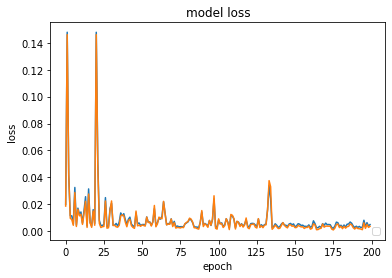

5/5 [==============================] - 0s 90ms/step
train_loss: 0.00524650514125824
test_loss: 0.004099568352103233


In [32]:
plt.plot(train_loss1)
plt.plot(val_loss1)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train1 = model.evaluate(x_noisy1,x_train1)
test1 = model.evaluate(x_noisy_val1,x_val1)
print("train_loss:",train1)
print("test_loss:",test1)

No handles with labels found to put in legend.


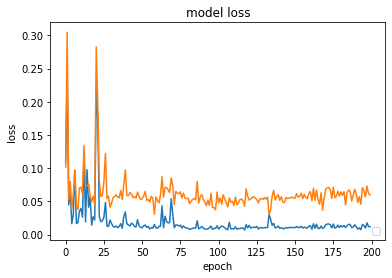

5/5 [==============================] - 0s 91ms/step
train_loss: 0.012394384481012821
test_loss: 0.06221169978380203


In [33]:
plt.plot(train_loss2)
plt.plot(val_loss2)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train2 = model.evaluate(x_noisy2,x_train2)
test2 = model.evaluate(x_noisy_val2,x_val2)
print("train_loss:",train2)
print("test_loss:",test2)

No handles with labels found to put in legend.


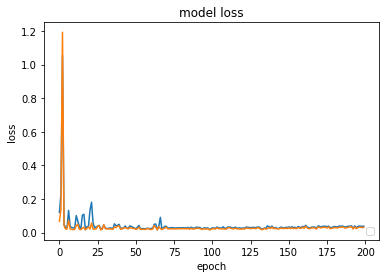

5/5 [==============================] - 0s 88ms/step
train_loss: 0.028813926503062248
test_loss: 0.022659743204712868


In [34]:
plt.plot(train_loss3)
plt.plot(val_loss3)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train3 = model.evaluate(x_noisy3,x_train3)
test3 = model.evaluate(x_noisy_val3,x_val3)
print("train_loss:",train3)
print("test_loss:",test3)

No handles with labels found to put in legend.


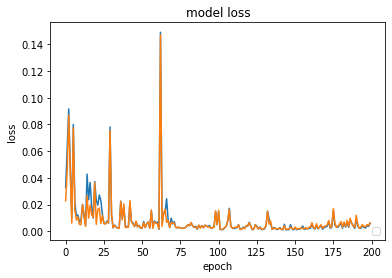

5/5 [==============================] - 0s 90ms/step
train_loss: 0.004357513505965471
test_loss: 0.004947430454194546


In [35]:
plt.plot(train_loss4)
plt.plot(val_loss4)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train4 = model.evaluate(x_noisy4,x_train4)
test4 = model.evaluate(x_noisy_val4,x_val4)
print("train_loss:",train4)
print("test_loss:",test4)

No handles with labels found to put in legend.


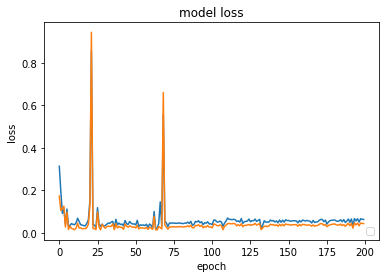

5/5 [==============================] - 0s 89ms/step
train_loss: 0.04263870790600777
test_loss: 0.027407309040427208


In [36]:
plt.plot(train_loss5)
plt.plot(val_loss5)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train5 = model.evaluate(x_noisy5,x_train5)
test5 = model.evaluate(x_noisy_val5,x_val5)
print("train_loss:",train5)
print("test_loss:",test5)

No handles with labels found to put in legend.


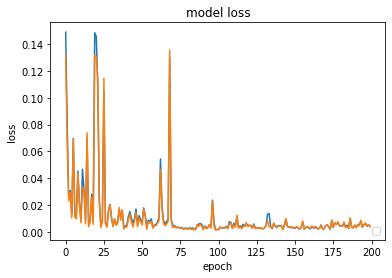

5/5 [==============================] - 0s 89ms/step
train_loss: 0.004033970180898905
test_loss: 0.00436414685100317


In [37]:
plt.plot(train_loss6)
plt.plot(val_loss6)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()
train6 = model.evaluate(x_noisy6,x_train6)
test6 = model.evaluate(x_noisy_val6,x_val6)
print("train_loss:",train6)
print("test_loss:",test6)

##predict

In [0]:
import time

In [54]:
#時間計測
t1 = time.time() 
 
how_cancel=model.predict(x_noisy_val6)
how_cancel1=[]
how_cancel_re=[]
how_cancel_gri=[]
for i in range(len(how_cancel)):
  how_cancel1.append(np.exp(how_cancel[i] * (trainmax_noisy1 - trainmin_noisy1) + trainmin_noisy1))
  how_cancel_re.append(how_cancel1[i].reshape(513,173*1))
  how_cancel_gri.append(lc.griffinlim(how_cancel_re[i]))


cancel=np.concatenate([how_cancel_gri[0], how_cancel_gri[1],how_cancel_gri[2],how_cancel_gri[3],how_cancel_gri[4]],axis =0)
# 処理後の時刻
t2 = time.time()



# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")
ipd.Audio(data=cancel,rate=44100)

経過時間：2.2310714721679688


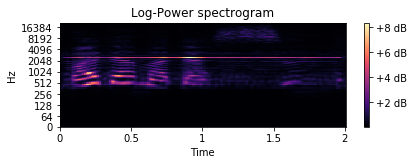

In [60]:
plt_power_spec(how_cancel_re[2],44100)

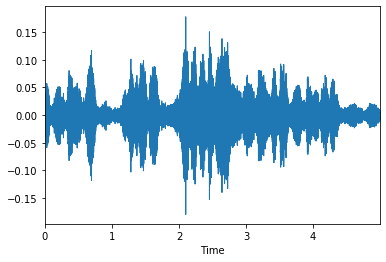

In [56]:
librosa.display.waveplot(cancel, sr=44100)

##元音声

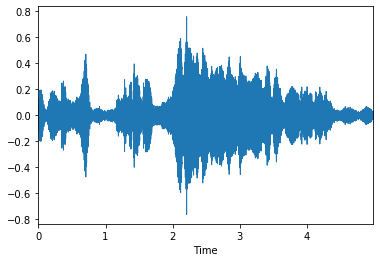

In [57]:

y0=[]
y=[]
y_gri=[]
for i in range(len(how_cancel)):
  y0.append(np.exp(x_noisy_val6[i]*(trainmax_noisy1 - trainmin_noisy1) + trainmin_noisy1))
  y.append(y0[i].reshape(513,173*1))
  y_gri.append(lc.griffinlim(y[i]))

test_audio=np.concatenate([y_gri[0], y_gri[1],y_gri[2],y_gri[3],y_gri[4]],axis =0)


librosa.display.waveplot(test_audio, sr=44100)

ipd.Audio(data=test_audio,rate=44100)
#print(test_audio)


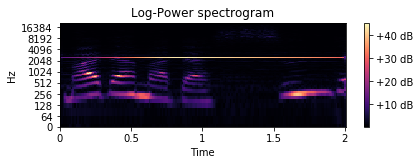

In [59]:
plt_power_spec(y[2],44100)

モデルの保存

In [61]:
json_string = model.to_json()
open('how_cancel_model.json', 'w').write(json_string)

25047

In [0]:
model.save_weights('howlingcanceller_epochs200_model_wights.h5')